# Homework 2

## BUSN 41204 - 2023

* Aman Krishna
* Christian Pavilanis
* Jingwen Li
* Yazmin Ramirez Delgado

In [445]:
import os
import pandas as pd
pd.set_option("display.precision", 4)
import numpy as np
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
import functools
from scipy import stats
import seaborn as sns
from sklearn.model_selection import LeavePOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import scipy as sp
import plotnine as p9
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
import random 
import math
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
pd.options.display.float_format = '{:.4f}'.format
pd.options.mode.chained_assignment = None  # default='warn'
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [318]:
bike_train = pd.read_csv('bike_train.csv')

In [349]:
bike_train.columns

Index(['daylabel', 'year', 'month', 'day', 'hour', 'season', 'holiday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'temp_bin'],
      dtype='object')

In [319]:
bike_train

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,2011,1,1,0,1,0,0,1.0000,9.8400,14.3950,81.0000,0.0000,16
1,1,2011,1,1,1,1,0,0,1.0000,9.0200,13.6350,80.0000,0.0000,40
2,1,2011,1,1,2,1,0,0,1.0000,9.0200,13.6350,80.0000,0.0000,32
3,1,2011,1,1,3,1,0,0,1.0000,9.8400,14.3950,75.0000,0.0000,13
4,1,2011,1,1,4,1,0,0,1.0000,9.8400,14.3950,75.0000,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10927,719,2012,12,19,19,4,0,1,1.0000,15.5800,19.6950,50.0000,26.0027,336
10928,719,2012,12,19,20,4,0,1,1.0000,14.7600,17.4250,57.0000,15.0013,241
10929,719,2012,12,19,21,4,0,1,1.0000,13.9400,15.9100,61.0000,15.0013,168
10930,719,2012,12,19,22,4,0,1,1.0000,13.9400,17.4250,61.0000,6.0032,129


### 1. Before you build your predictive model, let us first explore the data.
#### a. Visualize the relationship between count and each one of the following variables on a separate scatter plot: windspeed, humidity, temp, and atemp.

### WINDSPEED

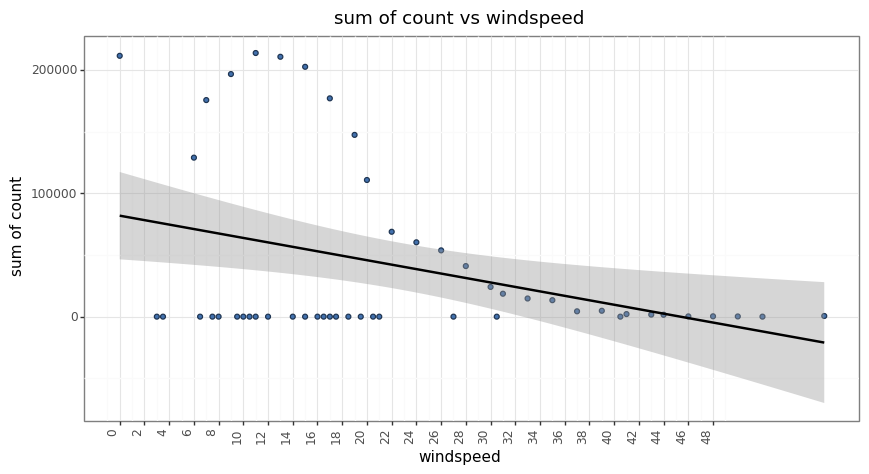

<ggplot: (392140541)>

In [320]:
# find the sum of count for each unique wind speed and store it in a new dataframe
wind_speed_count = bike_train.groupby('windspeed').sum()['count']
wind_speed_count = pd.DataFrame(wind_speed_count)
wind_speed_count.reset_index(inplace=True)
wind_speed_count.columns = ['windspeed', 'sum of count']

p9.ggplot(wind_speed_count, p9.aes(x='windspeed', y='sum of count')) + p9.geom_point(colour="#1F3552", fill="#4271AE") + p9.geom_smooth(method='lm', se=True) + p9.theme_bw() + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(0, 50, 2)) + p9.labs(title='sum of count vs windspeed')

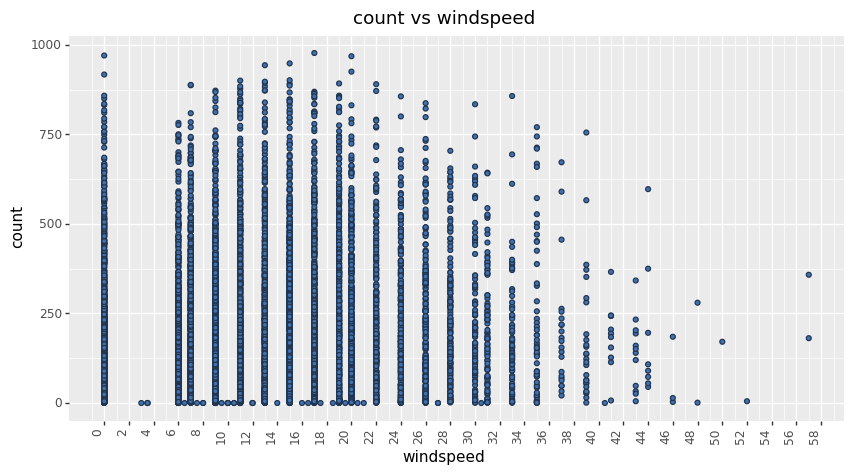

<ggplot: (392975860)>

In [321]:
# Scatter plot for windspeed vs count, sum the count for each windspeed
# Path: week3/hw2/bike_codebook.ipynb
p9.ggplot(bike_train, p9.aes(x='windspeed', y='count')) + p9.geom_point(colour="#1F3552", fill="#4271AE") + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(0, 100, 2)) + p9.labs(title='count vs windspeed')


### HUMIDITY

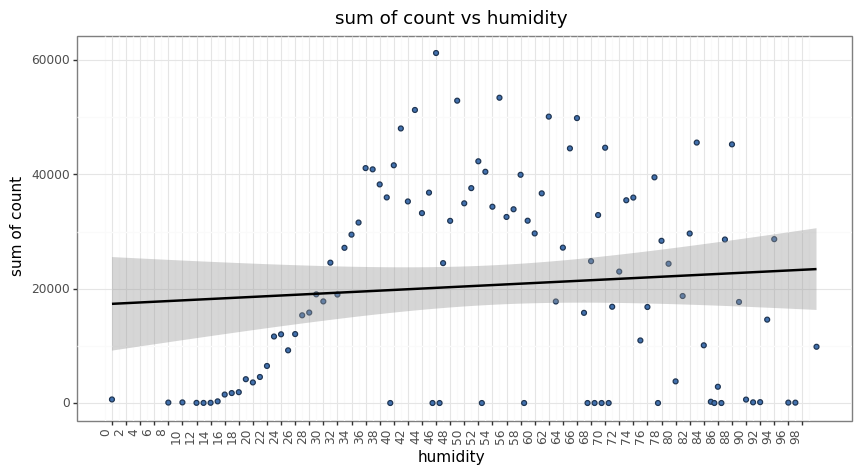

<ggplot: (392401240)>

In [322]:
# find the sum of count for each unique wind speed and store it in a new dataframe
humudity_count = bike_train.groupby('humidity').sum()['count']
humudity_count = pd.DataFrame(humudity_count)
humudity_count.reset_index(inplace=True)
humudity_count.columns = ['humidity', 'sum of count']

p9.ggplot(humudity_count, p9.aes(x='humidity', y='sum of count')) + p9.geom_point(colour="#1F3552", fill="#4271AE") + p9.geom_smooth(method='lm', se=True) + p9.theme_bw() + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(0, 100, 2)) + p9.labs(title='sum of count vs humidity')

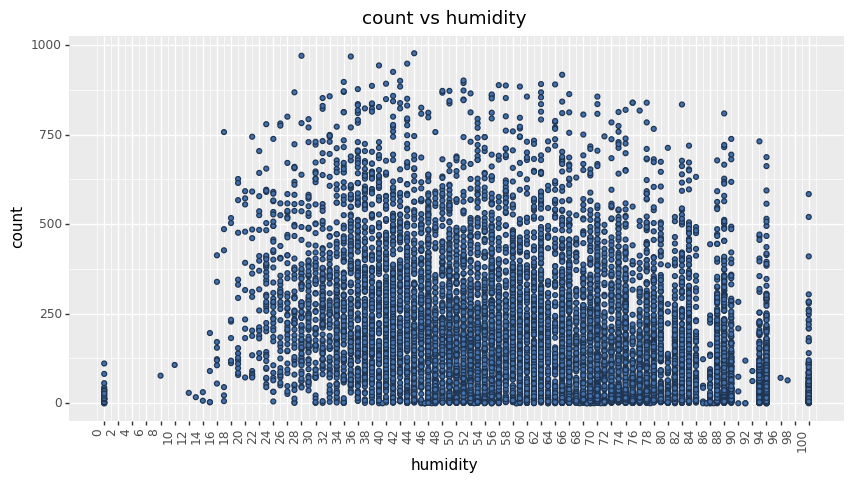

<ggplot: (392565785)>

In [390]:
# Scatter plot for humidity vs count, sum the count for each humidity
# Path: week3/hw2/bike_codebook.ipynb
p9.ggplot(bike_train, p9.aes(x='humidity', y='count')) + p9.geom_point(colour="#1F3552", fill="#4271AE") + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(0, 102, 2)) + p9.labs(title='count vs humidity')

### TEMP

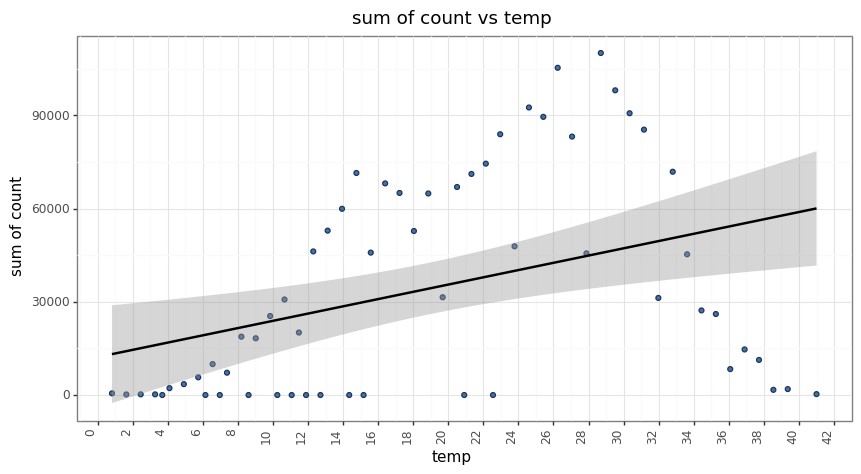

<ggplot: (391903723)>

In [324]:
# find the sum of count for each unique temp and store it in a new dataframe
temp_count = bike_train.groupby('temp').sum()['count']
temp_count = pd.DataFrame(temp_count)
temp_count.reset_index(inplace=True)
temp_count.columns = ['temp', 'sum of count']

p9.ggplot(temp_count, p9.aes(x='temp', y='sum of count')) + p9.geom_point(colour="#1F3552", fill="#4271AE") + p9.geom_smooth(method='lm', se=True) + p9.theme_bw() + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(-10, 100, 2)) + p9.labs(title='sum of count vs temp')

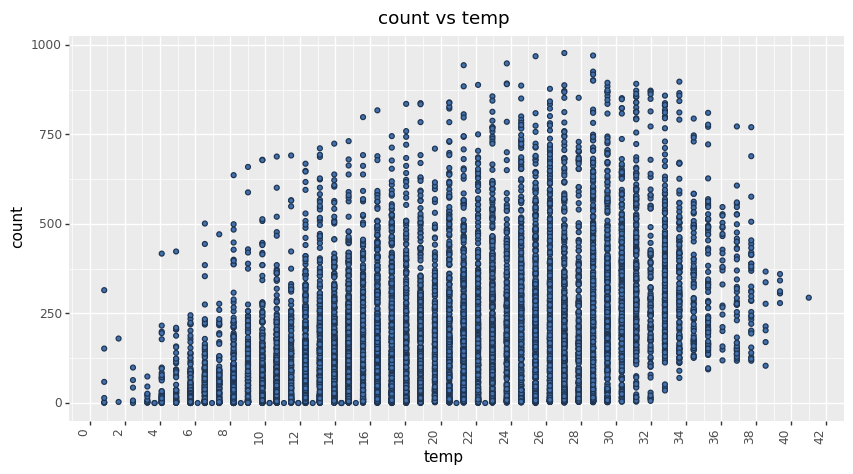

<ggplot: (393546114)>

In [325]:
# Scatter plot for temp vs count, sum the count for each temp
# Path: week3/hw2/bike_codebook.ipynb
p9.ggplot(bike_train, p9.aes(x='temp', y='count')) + p9.geom_point(colour="#1F3552", fill="#4271AE") + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(0, 100, 2)) + p9.labs(title='count vs temp')

### ATEMP

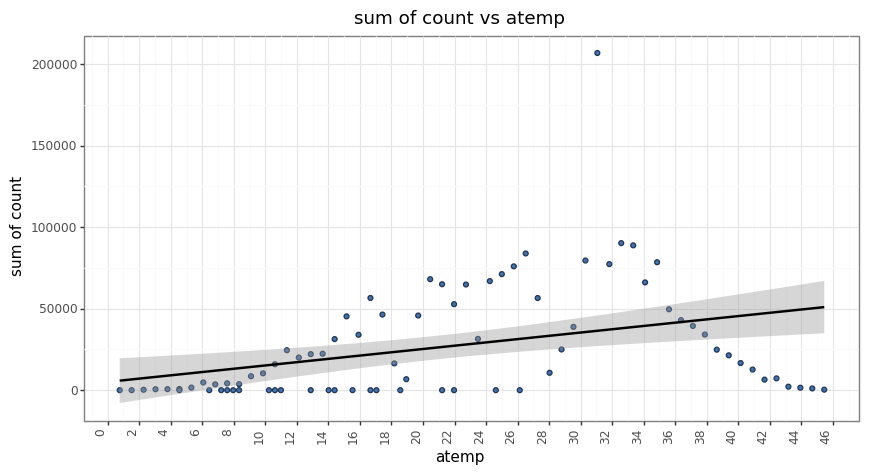

<ggplot: (679745558)>

In [326]:
# find the sum of count for each unique wind speed and store it in a new dataframe
atemp_count = bike_train.groupby('atemp').sum()['count']
atemp_count = pd.DataFrame(atemp_count)
atemp_count.reset_index(inplace=True)
atemp_count.columns = ['atemp', 'sum of count']

p9.ggplot(atemp_count, p9.aes(x='atemp', y='sum of count')) + p9.geom_point(colour="#1F3552", fill="#4271AE") + p9.geom_smooth(method='lm', se=True) + p9.theme_bw() + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(0, 50, 2)) + p9.labs(title='sum of count vs atemp')

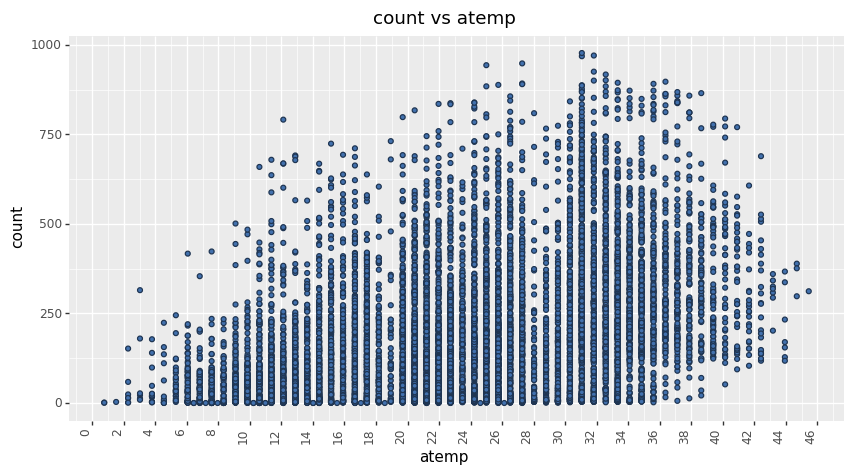

<ggplot: (679657978)>

In [391]:
# Scatter plot for atemp vs count, sum the count for each atemp
# Path: week3/hw2/bike_codebook.ipynb
p9.ggplot(bike_train, p9.aes(x='atemp', y='count')) + p9.geom_point(colour="#1F3552", fill="#4271AE") + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(0, 100, 2)) + p9.labs(title='count vs atemp')

#### b. How does count depend on the season? Consider visualizing this relationship with a boxplot.

In [327]:
#find the cum of count for each unique season and store it in a new dataframe
season_count = bike_train.groupby('season').sum()['count']
season_count = pd.DataFrame(season_count)
season_count.reset_index(inplace=True)
season_count.columns = ['season', 'sum of count']
season_count.set_index('season', inplace=True)
season_count.index = season_count.index.map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
season_count

,sum of count
season,
winter,312498
spring,588282
summer,640662
fall,544034


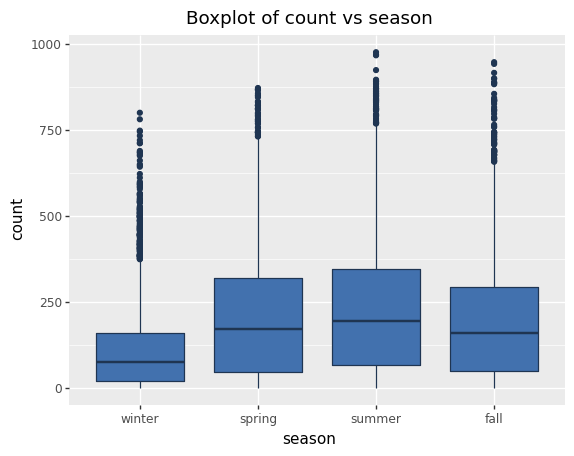

<ggplot: (391802230)>

In [328]:
bike_train["season"] = bike_train["season"].astype("category")
bike_train["season"] = bike_train["season"].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
p10 = p9.ggplot(bike_train, p9.aes("season", "count")) + p9.geom_boxplot(colour="#1F3552", fill="#4271AE") + p9.labs(title="Boxplot of count vs season")
p10

#### We see that Winter season has the lowest mean and sum of counts. The Spring and Summer seasons have the higher mean and sum of counts.

#### c. How does count depend on the time of the day (hour)? Does this relationship change depending on whether it is a workingday or not? A scatterplot could be used to visualize the relationship.You might consider coloring the observations on the scatterplot using the temperature (temp or atemp) to discern how the temperature affects hourly number of rentals.

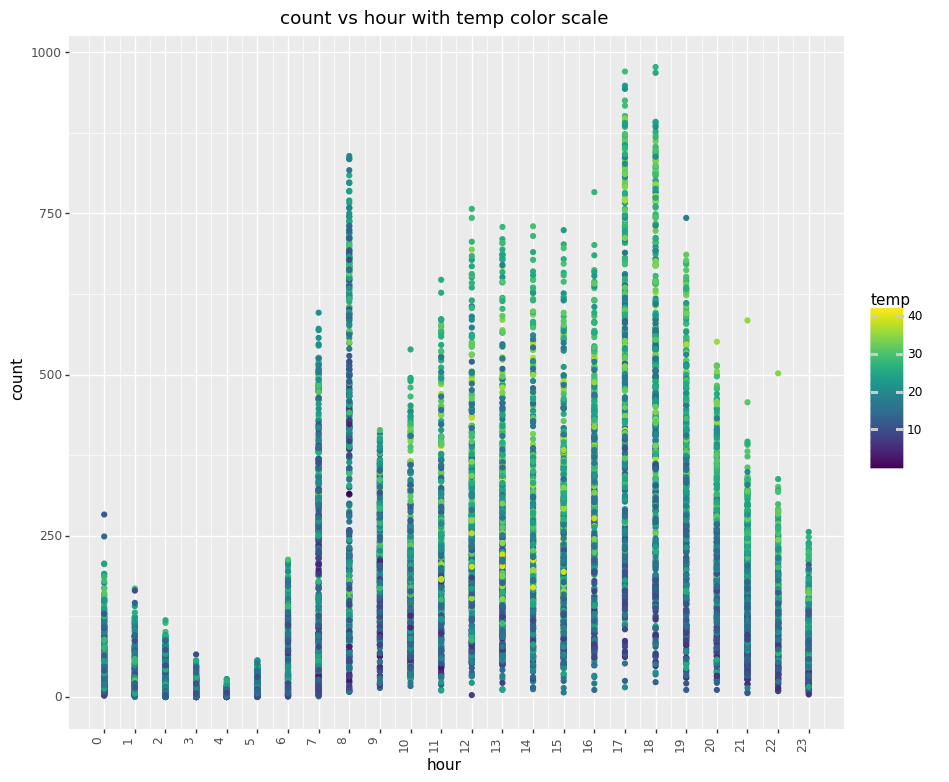

<ggplot: (679508989)>

In [329]:
#Create a scatter plot for time of day vs count and color the points by temp
p9.ggplot(bike_train, p9.aes(x='hour', y='count', color='temp')) + p9.geom_point() + p9.theme(figure_size=(10, 9), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(0, 24, 1)) + p9.labs(title='count vs hour with temp color scale')

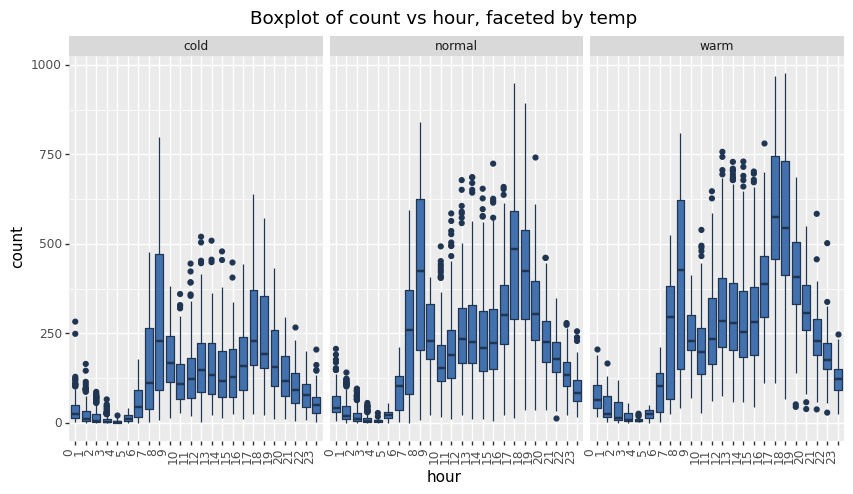

<ggplot: (357176058)>

In [330]:
bike_train["hour"] = bike_train["hour"].astype("category")
p13 = p9.ggplot(bike_train, p9.aes("hour", "count")) + p9.geom_boxplot(colour="#1F3552", fill="#4271AE") + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1))
#qcut the temperature into 4 bins
bike_train["temp_bin"] = pd.qcut(bike_train["temp"], 3)
bike_train["temp_bin"] = bike_train["temp_bin"].astype("category")
bike_train["temp_bin"] = bike_train["temp_bin"].cat.rename_categories(["cold", "normal", "warm"])
p13 = p13 + p9.facet_grid(".~temp_bin")
#add labels to the facets
p13 = p13 + p9.labs(x="hour", y="count", title="Boxplot of count vs hour, faceted by temp")
p13

- We see a clear trend that warmer temperatures have more rentals. 
- Furthermore, we see that on colder days the number of rentals in the evening is lower than the number of rentals in the morning.

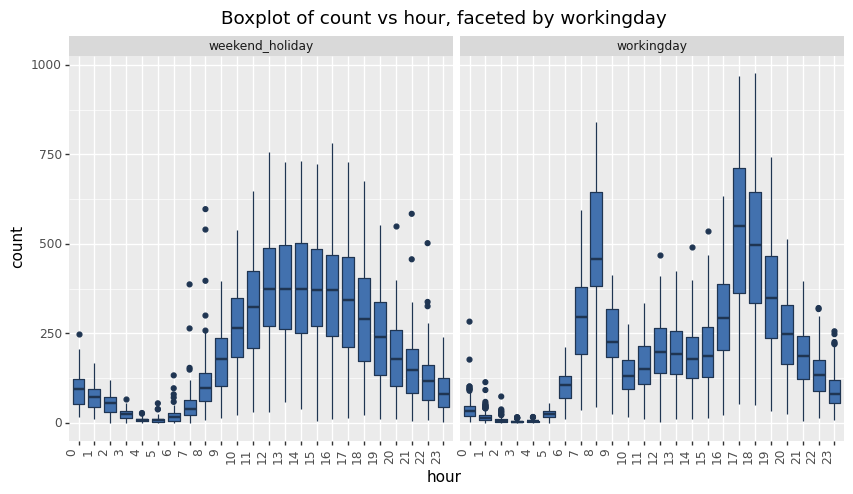

<ggplot: (377547249)>

In [331]:
bike_train["hour"] = bike_train["hour"].astype("category")
p11 = p9.ggplot(bike_train, p9.aes("hour", "count")) + p9.geom_boxplot(colour="#1F3552", fill="#4271AE") + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1))
bike_train["workingday"] = bike_train["workingday"].astype("category")
#change the 0's to "holiday" and 1's to "workingday"
bike_train["workingday"] = bike_train["workingday"].map({0: "weekend_holiday", 1: "workingday"})
p11 = p11 + p9.facet_grid(".~workingday")
#add labels to the facets
p11 = p11 + p9.labs(x="hour", y="count", title="Boxplot of count vs hour, faceted by workingday")
p11

#### Plotting count vs hour by both the temperature and workingday variables.

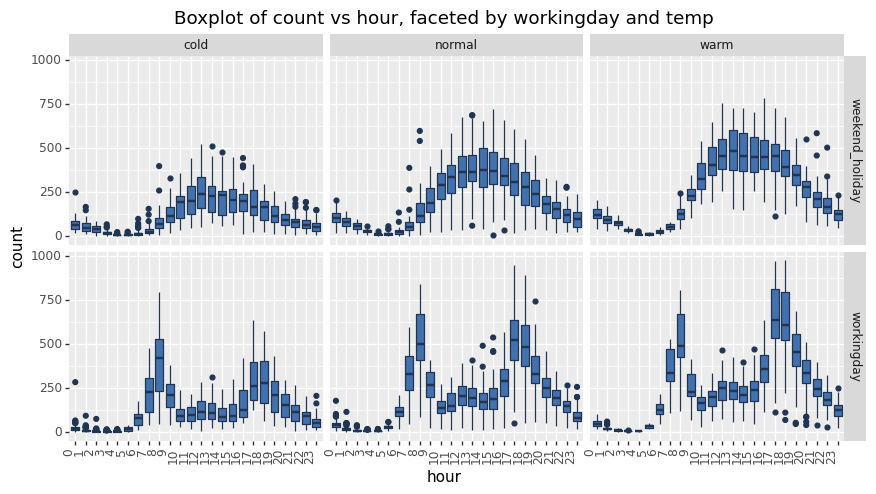

<ggplot: (343244147)>

In [332]:
p14 = p9.ggplot(bike_train, p9.aes("hour", "count")) + p9.geom_boxplot(colour="#1F3552", fill="#4271AE") + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1))
p14 = p14 + p9.facet_grid("workingday~temp_bin")
p14 = p14 + p9.labs(x="hour", y="count", title="Boxplot of count vs hour, faceted by workingday and temp")
p14

- We obsere that the Working Day hours show a higher count (in terms of mean and sum) during the morning and evening office to-fro hours.
- The Non-Working Day hours show a higher count during the afternoon hours. The temperature does not seem to have a significant effect on the count.
- Further, we note that the non-working days strecth to later hours than the working days. This could be due to the fact that the non-working days are weekends and people tend to stay out later on weekends.

#### d. Does the relationship between count and hour change by season?

In [333]:
bike_train['hour'] = bike_train['hour'].astype('int')
bike_train["workingday"] = bike_train["workingday"].map({"weekend_holiday": 0, "workingday": 1})
bike_train["workingday"] = bike_train["workingday"].astype("int")

In [334]:
#create a new dataframe with sum of count for each hour by season
hour_season_count = bike_train.groupby(['hour', 'season']).sum()['count']
hour_season_count = pd.DataFrame(hour_season_count)
hour_season_count.reset_index(inplace=True)

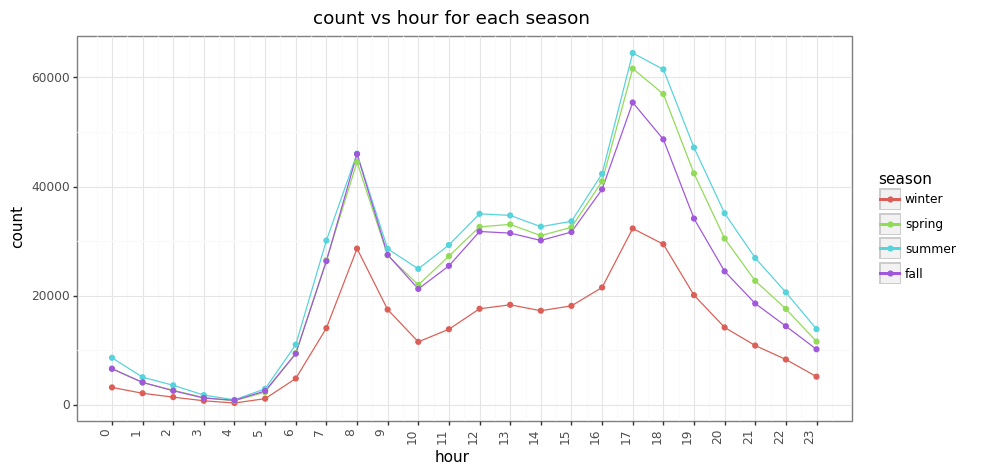

<ggplot: (393628420)>

In [335]:
#plot a line chart the count vs hour for each season and use a dotted line
p15 = p9.ggplot(hour_season_count, p9.aes(x='hour', y='count', color='season')) + p9.geom_line() + p9.theme_bw() + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(0, 24, 1)) + p9.labs(title='count vs hour for each season') + p9.geom_point()
p15

- Yes, there is a change in the relationship between count and hour by season.
- As expected, the Spring and Summer seasons have a higher count than the Fall and Winter seasons.
- The Summer season has the highest count across all hours. The Winter season has the lowest count across all hours.

In [336]:
#revert the season back to numeric
bike_train["season"] = bike_train["season"].map({'winter': 1, 'spring': 2, 'summer': 3, 'fall': 4})
bike_train["season"] = bike_train["season"].astype("int")

#### e. Does the distribution of hourly number of rentals change between 2011 and 2012? What does this tell you about the rental business?

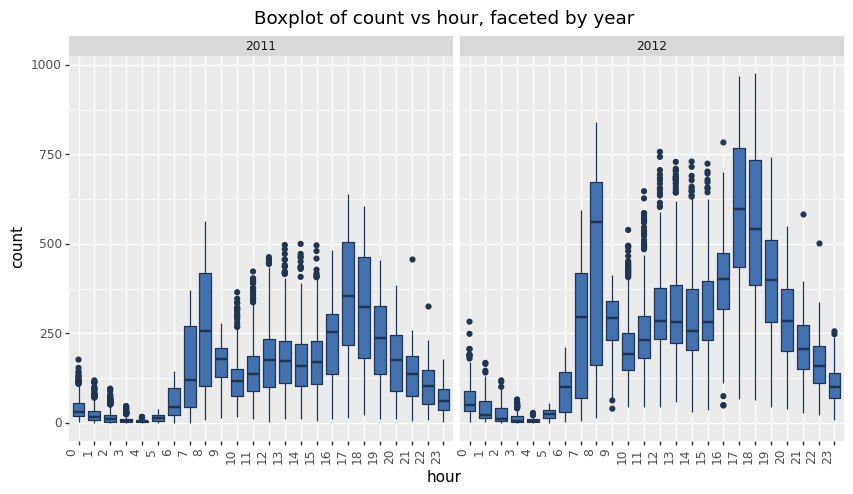

<ggplot: (393537783)>

In [337]:
bike_train["hour"] = bike_train["hour"].astype("category")
bike_train["year"] = bike_train["year"].astype(str)
p16 = p9.ggplot(bike_train, p9.aes("hour", "count")) + p9.geom_boxplot(colour="#1F3552", fill="#4271AE") + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1))
p16 = p16 + p9.facet_grid(".~year")
#add labels to the facets
p16 = p16 + p9.labs(x="hour", y="count", title="Boxplot of count vs hour, faceted by year")
p16

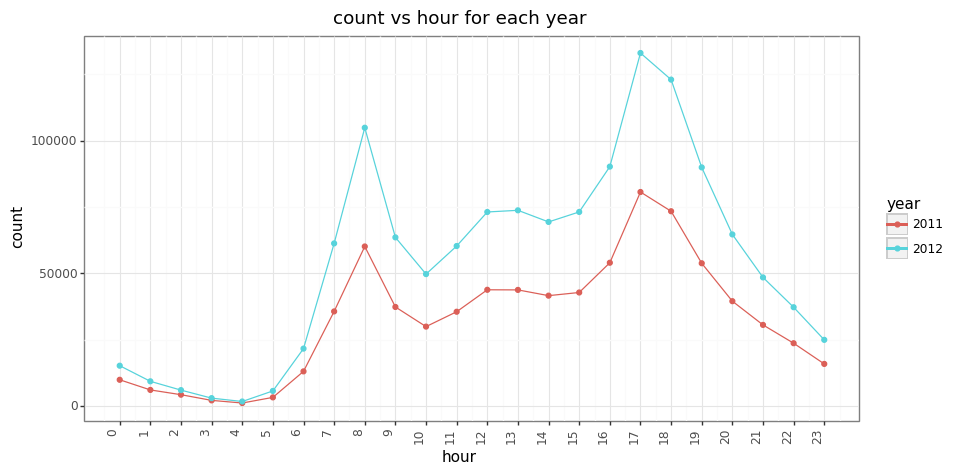

<ggplot: (392873506)>

In [340]:
bike_train['hour'] = bike_train['hour'].astype('int')
#create a new dataframe with sum of count for each hour by year
hour_year_count = bike_train.groupby(['hour', 'year']).sum()['count']
hour_year_count = pd.DataFrame(hour_year_count)
hour_year_count.reset_index(inplace=True)
#plot count vs hour for each year
p17 = p9.ggplot(hour_year_count, p9.aes(x='hour', y='count', color='year')) + p9.geom_line() + p9.theme_bw() + p9.theme(figure_size=(10, 5), axis_text_x=p9.element_text(angle=90, hjust=1)) + p9.scale_x_continuous(breaks=range(0, 24, 1)) + p9.labs(title='count vs hour for each year') + p9.geom_point()
p17

- We see that the distribution of hourly number of rentals is similar between 2011 and 2012.
- The magnitude of the distribution is higher in 2012 than in 2011.
- This tells us that the rental business has grown over the year.

In [387]:
bike_train["year"] = bike_train["year"].astype("int")
bike_train.drop("temp_bin", axis=1, inplace=True)

### 2. Build a model to predict the bikeshare counts for the hours recorded in the test dataset.

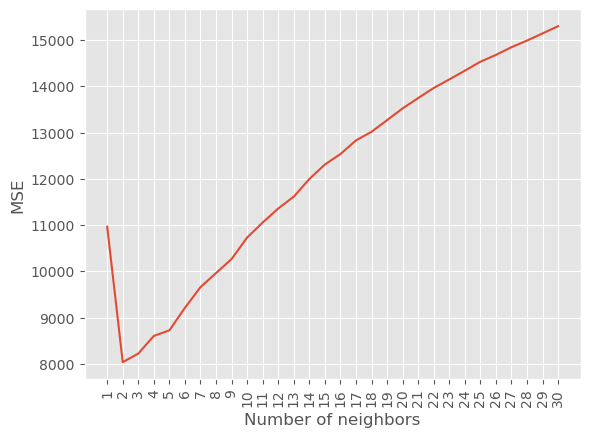

Minimum MSE: 8037.333104709648


In [388]:
# Import the necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd


# Define the features (columns) and target (count)
X = bike_train[['daylabel', 'year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
y = bike_train['count']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SelectKBest object to select the top k features
selector = SelectKBest(f_regression, k=4)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Create a new dataframe with only the selected features
X_train_new = X_train[X_train.columns[selected_features]]
X_test_new = X_test[X_test.columns[selected_features]]

# Create a list to store the MSE values
mse_values = []

# Loop through different values of n_neighbors
for n in range(1, 31):
    # Create the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)

    # Fit the model to the training data
    knn.fit(X_train_new, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test_new)

    # Calculate the MSE of the predictions
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the MSE values against the number of neighbors
import matplotlib.pyplot as plt
plt.plot(range(1,31), mse_values)
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')
#set xticks to 1, 2, 3, ..., 30
plt.xticks(range(1,31))
#tilt the xticks
plt.xticks(rotation=90)
plt.show()
print(f'Minimum MSE: {min(mse_values)}')

In [499]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Define the parameter grid
param_grid = {'max_depth': [5],
              'n_estimators': [900],
              'learning_rate': [0.3,0.2],
              }

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bike_train.drop(columns=['count']), bike_train['count'], test_size=0.2, random_state=42)


# Create the XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, alpha = 10)

# Define the KFold cross-validation
kf = KFold(n_splits=5)

# Use GridSearchCV with KFold cross-validation to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=kf, verbose=2)
grid_search.fit(bike_train.drop(columns=['count']), bike_train['count'])


# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predict the 'count' using the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", rmse)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=900; total time=   1.6s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=900; total time=   1.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=900; total time=   1.5s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=900; total time=   1.5s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=900; total time=   1.5s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=900; total time=   1.3s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=900; total time=   1.6s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=900; total time=   1.4s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=900; total time=   1.5s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=900; total time=   1.2s
Best parameters:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 900}
Root Mean Squared Error:  25.458936375447127


In [500]:
# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predict the 'count' using the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", rmse)

Best parameters:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 900}
Root Mean Squared Error:  25.458936375447127


In [501]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Define the parameter grid
param_grid = {'n_estimators': [260],
              'max_depth': [15],
              'min_samples_split': [2],
              'min_samples_leaf': [3]
              }

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the KFold cross-validation
kf = KFold(n_splits=5)

# Use GridSearchCV with KFold cross-validation to find the best parameters
grid_search = GridSearchCV(rf_model, param_grid, cv=kf, verbose=2)
grid_search.fit(bike_train.drop(columns=['count']), bike_train['count'])


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   4.4s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   4.3s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   4.3s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   4.4s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   4.4s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=260; total time=   4.6s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=260; total time=   4.5s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=260; total time=   4.5s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=2, n_estimators=260; total time=   4.5s
[CV] END max_depth=14, min_samp

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [14, 15], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2], 'n_estimators': [250, 260]},
             verbose=2)

In [502]:
# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predict the 'count' using the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", rmse)

Best parameters:  {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 260}
Root Mean Squared Error:  23.37276215446016


In [503]:
#use the model to predict the test data
bike_test = pd.read_csv("Bike_test.csv")

y_pred = grid_search.predict(bike_test)

#make the negative values to 0
y_pred[y_pred < 0] = 0

In [504]:
y_pred_df = pd.DataFrame(y_pred)
#rename the columns to Id and count
y_pred_df.columns = ['count']
y_pred_df.index.name = 'Id'
#Add 1 to the index
y_pred_df.index = y_pred_df.index + 1
y_pred_df.to_csv("Bike_test_predictions.csv")